In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
X = df.iloc[:,:-1].values
y = df['Outcome'].values


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1111)

In [6]:
st = StandardScaler()
X_train_scale = st.fit_transform(X_train)
X_test_scale = st.transform(X_test)

In [7]:
model = Sequential()
model.add(Dense(12,input_shape = (8,), activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(SGD(learning_rate=.003),"binary_crossentropy",metrics=["accuracy"])
run_hist = model.fit(X_train_scale, y_train, validation_data=(X_test_scale, y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 3s 34ms/step - loss: 1.1173 - accuracy: 0.3316 - val_loss: 1.0043 - val_accuracy: 0.4010
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 1.0723 - accuracy: 0.3316 - val_loss: 0.9673 - val_accuracy: 0.4010
Epoch 3/200
18/18 [==============================] - 0s 7ms/step - loss: 1.0305 - accuracy: 0.3316 - val_loss: 0.9331 - val_accuracy: 0.4010
Epoch 4/200
18/18 [==============================] - 0s 6ms/step - loss: 0.9917 - accuracy: 0.3333 - val_loss: 0.9017 - val_accuracy: 0.4010
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 0.9558 - accuracy: 0.3333 - val_loss: 0.8729 - val_accuracy: 0.4010
Epoch 6/200
18/18 [==============================] - 0s 6ms/step - loss: 0.9227 - accuracy: 0.3333 - val_loss: 0.8466 - val_accuracy: 0.4010
Epoch 7/200
18/18 [==============================] - 0s 8ms/step - loss: 0.8924 - accuracy: 0.3351 - val_loss: 0.8227 - val_accuracy: 0.4010
Epoch 8/200


In [46]:
y_pred_prob = model.predict(X_test_scale)
y_pred_class = np.argmax(y_pred_prob, axis=-1)

6/6 [==============================] - 0s 2ms/step


In [56]:
accuracy_score(y_test, y_pred_class),roc_auc_score(y_test, y_pred_prob)

(0.5989583333333334, 0.8199887069452287)

In [72]:
def plot_roc(y_test, y_pred):
    fpr, tpr, thr = roc_curve(y_test,y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(fpr,tpr,'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem',
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])


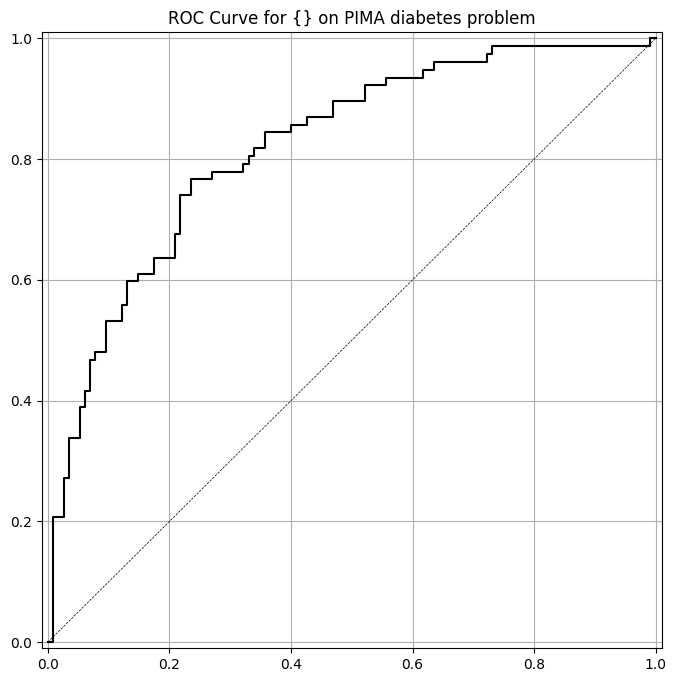

In [73]:
plot_roc(y_test, y_pred_prob)

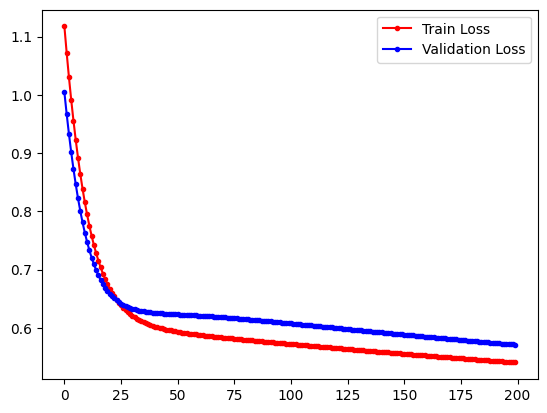

In [81]:
fig, ax = plt.subplots()
ax.plot(run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [1]:
run_hist

NameError: name 'run_hist' is not defined